<a href="https://colab.research.google.com/github/TarunKumar19/Cotton-Disease-Predection./blob/main/Cotton_Disease_Predection_resnet152V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/val'

In [9]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in resnet152V2.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')
folders

['/content/drive/MyDrive/data/train/fresh cotton plant',
 '/content/drive/MyDrive/data/train/diseased cotton leaf',
 '/content/drive/MyDrive/data/train/fresh cotton leaf',
 '/content/drive/MyDrive/data/train/diseased cotton plant']

In [12]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [13]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [14]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import array_to_img, img_to_array, load_img

In [17]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
history=model.fit(training_set,validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/20
61/61 [==============================] - 394s 6s/step - loss: 1.1976 - accuracy: 0.8252 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 2/20
61/61 [==============================] - 45s 738ms/step - loss: 0.4584 - accuracy: 0.9272 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 43s 704ms/step - loss: 0.3589 - accuracy: 0.9436 - val_loss: 4.1809e-04 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 43s 696ms/step - loss: 0.3474 - accuracy: 0.9513 - val_loss: 0.0956 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 44s 715ms/step - loss: 0.3987 - accuracy: 0.9575 - val_loss: 0.3747 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 42s 695ms/step - loss: 0.3024 - accuracy: 0.9569 - val_loss: 2.9153e-04 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 42s 690ms/step - loss: 0.3017 - accuracy: 0.9646 - val_loss: 0.0282 - val_accuracy: 

In [21]:
import matplotlib.pyplot as plt

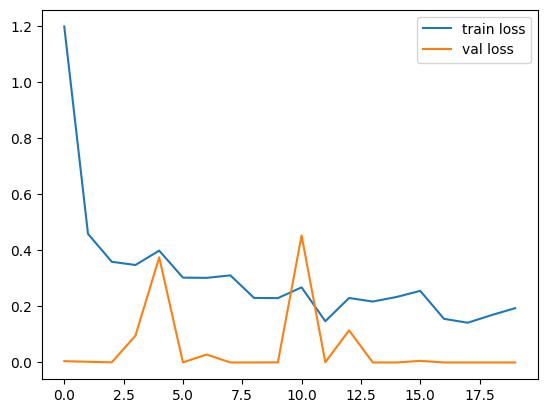

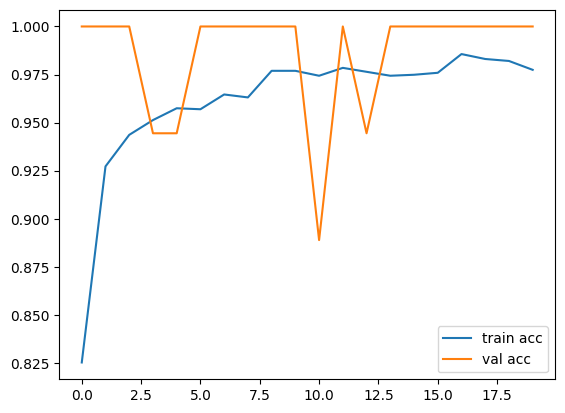

<Figure size 640x480 with 0 Axes>

In [22]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [35]:
y_pred = model.predict(test_set)

1/1 [==============================] - 3s 3s/step


In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_resnet152V2.h5')

In [40]:
img=image.load_img('/content/drive/MyDrive/data/test/diseased cotton plant/dd (367).jpg',target_size=(224,224))

In [42]:
x=image.img_to_array(img)
x.shape

(224, 224, 3)

In [45]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [46]:
classes = { 0:'diseased cotton leaf',
            1:'diseased cotton plant', 
            2:'diseased cotton leaf', 
            3:'diseased cotton plant', 
          }

In [47]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    predict_x = model.predict(X_test)
    Y_pred =np.argmax(predict_x,axis=1)
 
    return image,Y_pred
     

1/1 [==============================] - 0s 49ms/step
Predicted traffic sign is:  diseased cotton leaf


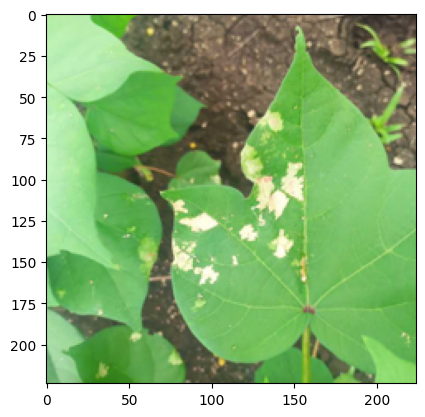

In [54]:
plot,prediction = test_on_img(r'/content/drive/MyDrive/data/val/diseased cotton leaf/dis_leaf (100)_iaip.jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()